<a href="https://colab.research.google.com/github/Amrit007-droid/Netflix_Movies_And_TvShows_Clustering_/blob/main/Amrit_Saikia_Netflix_Movies_And_TvShows_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Name : Netflix Movie and TV Show Clustering***

### ***Project Type - Unsupervised Learning***
### ***Contribution - Individual***
### ***Name - Amrit Pratim Saikia***

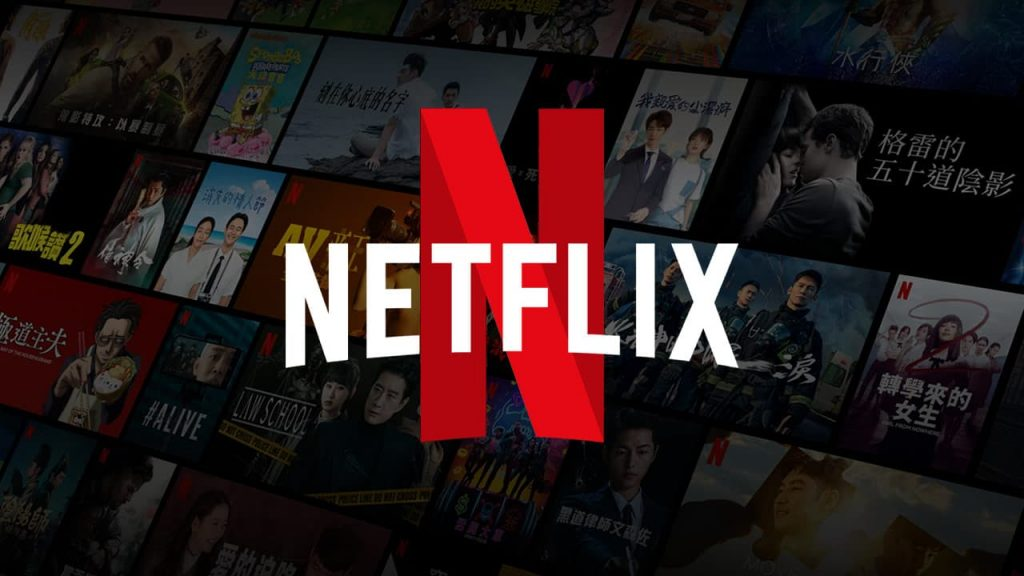



# **Project Summary -**

The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

Additionally, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry.

The project followed a step-by-step process:


1.   Handling null values in the dataset.
2.   Managing nested columns (director, cast, listed_in, country) for better visualization.

1.   Binning the rating attribute into categories (adult, children's, family-friendly, not rated).
2.   Performing Exploratory Data Analysis (EDA) to gain insights for preventing subscriber churn.

1.   Creating clusters using attributes like director, cast, country, genre, rating, and description. These attributes were tokenized, preprocessed, and vectorized using TF-IDF vectorizer.
2.   Reducing the dimensionality of the dataset using PCA to improve performance.

1.   Employing K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, determining optimal cluster numbers (4 for K-Means, 2 for hierarchical clustering) through various evaluation methods.
2.   Developing a content-based recommender system using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix.

Developing a content-based recommender system using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix.









# **GitHub Link -**

Repository Link : https://github.com/Amrit007-droid/Netflix_Movies_And_TvShows_Clustering_.git

# **Problem Statement**


This dataset consists of tv shows and movies availiable on Netflix as of 2019. The dataset is collected from Flixable which is a third party Netflix search engine. In 2018 they released an interested report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service number of movies has decreased by more than 2,000 titles since 2010 while its number of Tv Shows has nearly tripled. It will be interesting to explore what other insights can be obtained from the same dataset

Integrating this dataset with other external dataset such as IMDB ratigs, rotten tomatoes can also provide many interesting findings.

In this project we are required to do :

*   Exploratory Data Analysis
*   understanding what type of content is availiable in different countries.

*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matchmaking text-based feautures.





## **Attribute Descriptions**


*   **show_id** - Unique ID for every Movie/Tv Show.
*   **type** - Identifier- A Movie or Tv Show.

*   **title** - Title of the Movie/Show.
*   **director** - Director of the show.

*   **Cast** - Actors involved.
*   **Country** - Country of Production.

*   **date_added** - Date it was added on Netflix.
*   **release_year** - Actual release year of the show.

*   **rating** - Tv rating of the Show.
*   **duration** - Total duration in minutes or number of seasons.

*   **listed_in** - Genre.
*   **Description** - The summary description.













# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#libraries to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Projects(Almabetter)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Rows and Column count in the Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


It's good to see that we do not have any duplicated observation in our dataset.

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


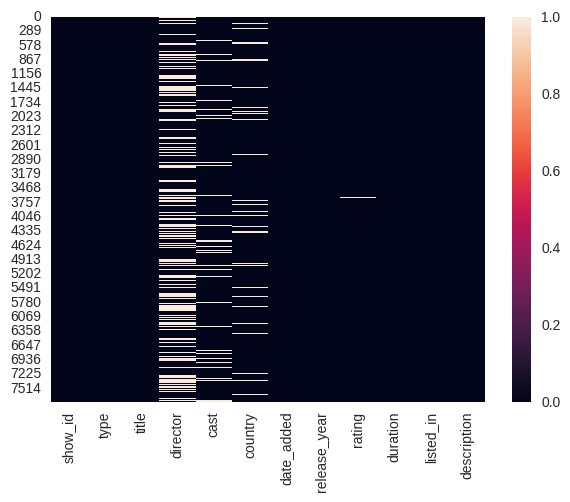

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=True)
plt.show()

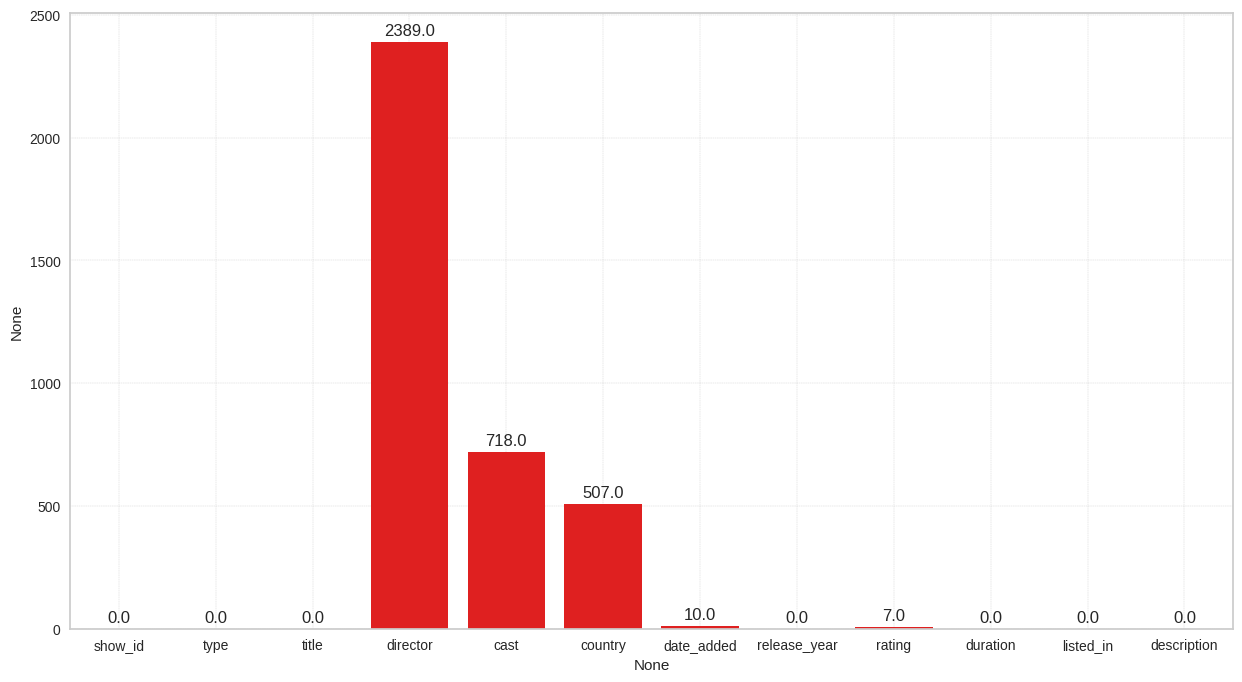

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plots = sns.barplot(x=df.columns, y=df.isna().sum(), color='red')
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.show()


### What did you know about your dataset?

The dataset "Netflix Movies and TV Shows Clustering" comprises 12 columns, with only one column having an integer data type. It does not contain any duplicate values, but it does have null values in five columns: director, cast, country, date_added, and rating.

This dataset provides a valuable resource for exploring trends in the range of movies and TV shows available on Netflix. Additionally, it can be utilized for developing clustering models to categorize similar titles together based on shared attributes such as genre, country of origin, and rating.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [12]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:


1.   show_id: Unique identifier for each movie/show.
2.   type: Indicates whether the entry is a movie or a TV show.

1.   title: Name of the movie or TV show.
2.   director: Name of the director(s) of the movie or TV show.

1.   cast: Names of the actors and actresses featured in the movie or TV show.
2.   country: Country or countries where the movie or TV show was produced.

1.   date_added: Date when the movie or TV show was added to Netflix.
2.   release_year: Year when the movie or TV show was released.

1.   rating: TV rating or movie rating of the movie or TV show
2.   duration: Length of the movie or TV show in minutes or seasons.

1.   listed_in: Categories or genres of the movie or TV show.
2.   description: Brief synopsis or summary of the movie or TV show.













### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(f"The number of Unique Values in : \n{df.nunique()}")

The number of Unique Values in : 
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code



### 1.   Handling Null values from each feature



In [14]:
# Write your code to make your dataset analysis ready.
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)                                                 # simply prints a line consisting of 50 dashes, creates a visual separator or divider in text output
print(df.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


In [15]:
df["date_added"].value_counts()

date_added
January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: count, Length: 1565, dtype: int64

In [16]:
df['rating'].value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [17]:
df['country'].value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64



1.   Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
2.   We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.

1.   We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.






In [18]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director', 'cast']] = df[['director', 'cast']].fillna('unknown')

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [19]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


### 2. Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [20]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [21]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
5904,Secret of the Nile,unknown
4449,Miss J Contemplates Her Choice,Jason Lai
3525,Kaabil,Sanjay Gupta
1435,Chill with Bob Ross,unknown
4229,Marco Luque: Tamo Junto,Caio Cobra
7420,The Ripper,Ellena Wood
5691,Romance Doll,Yuki Tanada
4088,Luccas Neto in: Children's Day,Lucas Margutti
6112,Six Windows in the Desert,Faisal al Amer
6940,The Giant,Jon Garaño


In [22]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
28798,Medal of Honor,Joseph Cross
23425,Jurassic World Camp Cretaceous,Glen Powell
7198,Black Panther,Letitia Wright
10450,Click for Murder,Donal MacIntyre
21560,Immortals,Nilperi Şahinkaya
21734,In This Corner of the World,Mayumi Shintani
6639,Bhai: Vyakti Ki Valli - Uttarardh,Dalip Tahil
29070,Merry Happy Whatever,Garcelle Beauvais
43504,The A List,Cian Barry
11212,Creeped Out,Andonis Anthony


In [23]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Genre
4922,Franca: Chaos and Creation,Documentaries
1892,Between Maybes,International Movies
14084,The Haunting of Hill House,TV Horror
10467,Pareeth Pandaari,Dramas
13091,TAU,Sci-Fi & Fantasy
4978,French Toast,Romantic Movies
8407,Mad Ron's Prevues from Hell,Horror Movies
8615,Mara,Horror Movies
9768,Next Gen,Sci-Fi & Fantasy
660,Across the Universe,Romantic Movies


In [24]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
4125,Kis Kisko Pyaar Karoon,India
8924,Two Lovers and a Bear,Canada
8987,Under The Skin,Switzerland
9404,World at Your Feet,Singapore
4000,"Kalel, 15",Philippines
6969,Star Men,United States
7063,Studio 54,United States
8493,The Tourist,United States
4712,Manolo: The Boy Who Made Shoes for Lizards,United Kingdom
4743,Maria Bamford: Old Baby,United States


Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.

### Merging all the unnested dataframes

In [25]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,3%,João Miguel,unknown,International TV Shows,Brazil
1,3%,João Miguel,unknown,TV Dramas,Brazil
2,3%,João Miguel,unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,unknown,TV Dramas,Brazil


### Now let's merge this dataframe with the original one on the "left join" to avoid information loss.

In [26]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head(7)

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
5,3%,Bianca Comparato,unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
6,3%,Michel Gomes,unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


### 3. Typecasting of attributes

In [27]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 14.8+ MB


In [28]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# Typecasting string object to datetime object of date_added column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [29]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         175807 non-null  object 
 1   Actors        175807 non-null  object 
 2   Directors     175807 non-null  object 
 3   Genre         175807 non-null  object 
 4   Country       175807 non-null  object 
 5   type          175807 non-null  object 
 6   release_year  175807 non-null  int64  
 7   rating        175807 non-null  object 
 8   duration      175807 non-null  int64  
 9   description   175807 non-null  object 
 10  day_added     174219 non-null  float64
 11  month_added   174219 non-null  float64
 12  year_added    174219 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 17.4+ MB


### 4. Binning of rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:

*   **Adult Content**: TV-MA, NC-17, R
*   **Children Content**: TV-PG, PG, TV-G, G

*   **Teen Content**: PG-13, TV-14
*   **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV

*   **Not Rated**: NR, UR








In [30]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [31]:
# Checking head after binning
df.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14.0,8.0,2020.0
1,3%,João Miguel,unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14.0,8.0,2020.0
2,3%,João Miguel,unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14.0,8.0,2020.0
3,3%,Bianca Comparato,unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14.0,8.0,2020.0
4,3%,Bianca Comparato,unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14.0,8.0,2020.0


### 5. Separating Movies and TV Shows

In [32]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

We have divided data wrangling into five different sections:

1.   In this section we have imputed/drop the null values of:

*   Imputed 'director' and 'cast' with 'Unknown'.
*   Imputed 'country' with Mode.

*   Drop null values of 'date_added' and 'rating' (less percentage).



2.   We have unnested values from following features:

*   'director'
*   'cast'

*   'listed_in'
*   'country'

*   We have unnested the values and stored in different dataframes and then merged all the dataframe with the original one using left join in order to get the isolated values of each of the feature

3. We have typecasted the following features:

*   'duration' into integer (Removing min and seasons from the values).
*   'date_added' to datetime (Into the required format).

4. We have also extracted the following features

*   'date' from 'date_added'.
*   'month' from 'date_added'.

*   'year' from 'date_added'.

4. We have seen that the 'rating' column contains various coded categories, so we have decided to create 5 bins and distribute the values accordingly:

*   Adult: TV-MA, NC-17
*   Restricted: R, UR

*   Teen: PG-13, TV-14
*   All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG

*   Not Rated: NR

5. Lastly we have splitted the dataframe into two df one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.

























## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - The relative percentage of total number of Movies and TV Shows over Netflix?

In [33]:
# Chart - 1 visualization code

import plotly.graph_objects as go

# Data
labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Different colors
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

# Create donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

# Show the chart
fig.show()

##### 1. Why did you pick the specific chart?

This graph shows us the percent of TV shows and movie data present on Netflix Data set

##### 2. What is/are the insight(s) found from the chart?



1.   We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.
2.   We can conclude that in the given Data set only 28.3% are TV Shows and 71.7% are Movies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.   Yes! the production house should more focus on quality movies because there is high competition in the market.
2.   TV Shows are less in numbers hence good opportunity for business.



#### Chart - 2 - How content is distributed over Netflix?

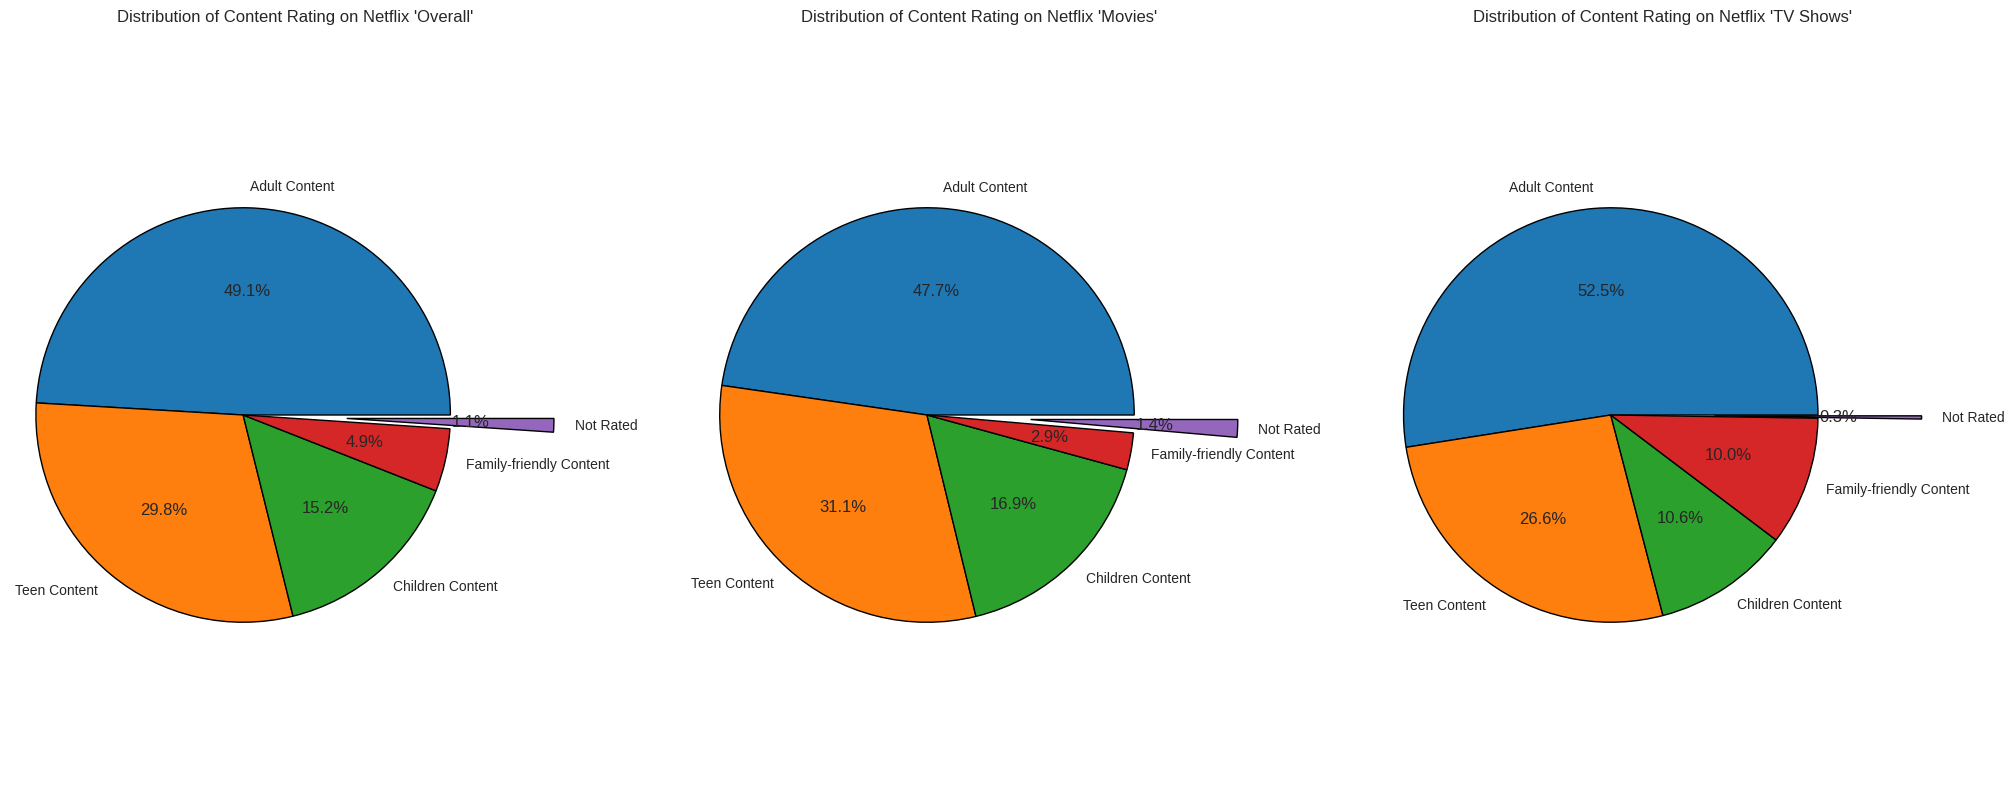

In [34]:
# Chart - 2 visualization code

import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
for i, j, k in ((df, 'Overall', 0), (df_movies, 'Movies', 1), (df_tvshows, 'TV Shows', 2)):
    plt.subplot(1, 3, k + 1)
    count = i['rating'].value_counts()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    plt.pie(count, labels=count.index, explode=(0, 0, 0, 0, 0.5), colors=colors,
            autopct='%1.1f%%', labeldistance=1.1, wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True})
    plt.title(f"Distribution of Content Rating on Netflix '{j}'")
    plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

We chose this chart to know the percentage of type of content present in the Netflix.

##### 2. What is/are the insight(s) found from the chart?



1.   We found that most of the content present in the Netflix belongs to Adult and the teen categories.
2.   Another important insight we can see that Family friendly content less in Movies compared to TV Shows.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.   .For high gains production house should more focus on Teen and Adult content.
2.   There is good chances of growth in Family-friendly category in TV Shows



#### Chart - 3 - Who are the top actors performing in Movies and TV Shows?

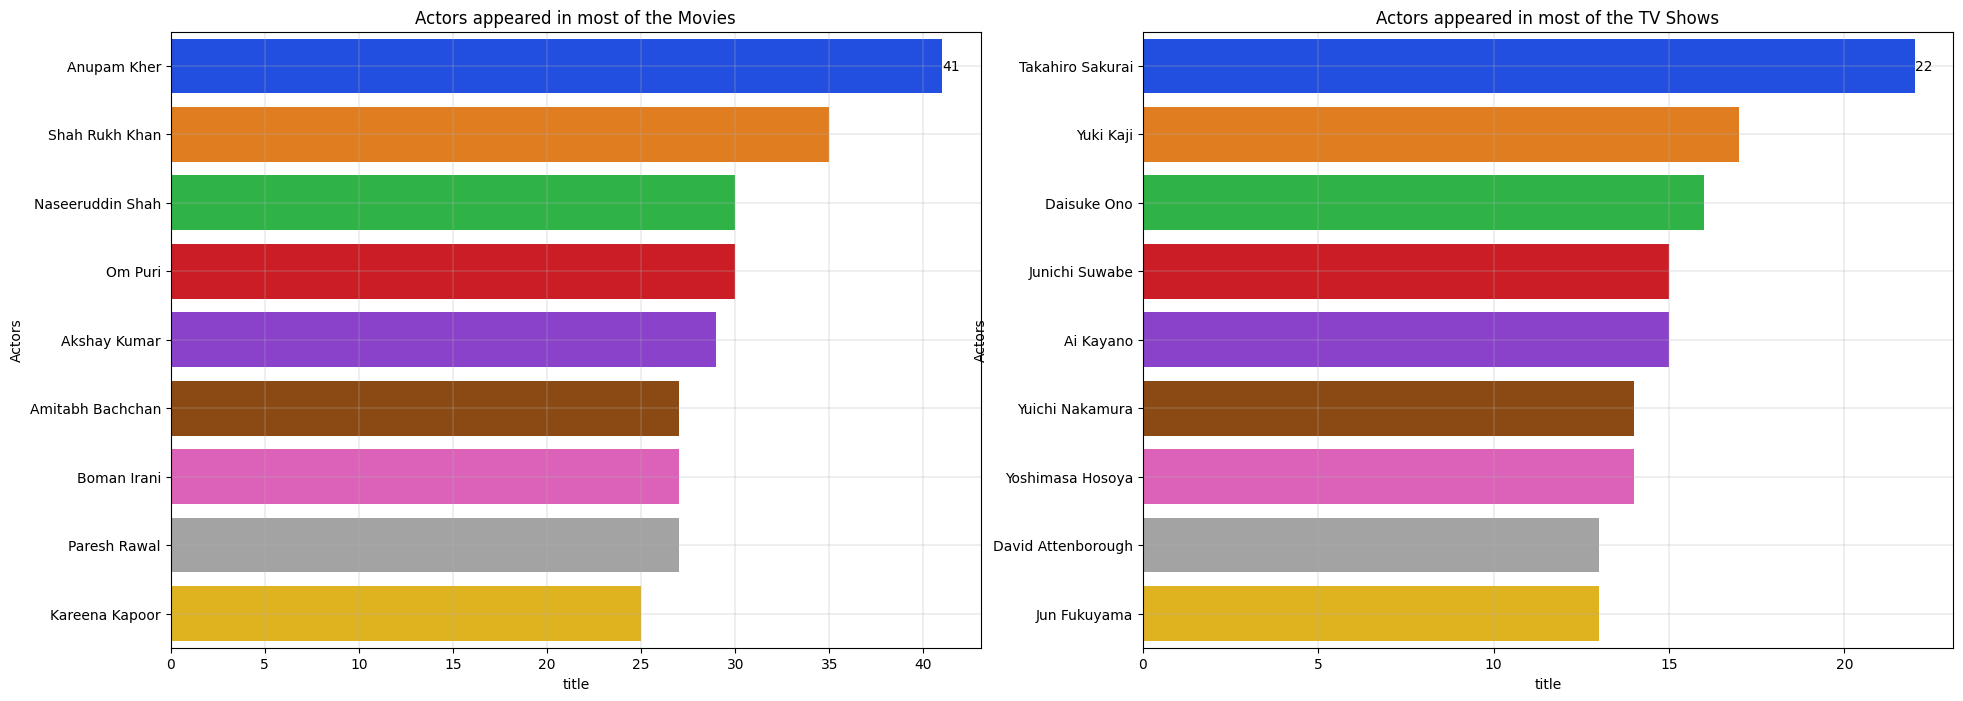

In [35]:
# Chart - 3 visualization code

plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='bright')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='-', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?



1.   Most of the Actors in Movies are from INDIA.
2.   No popular actors from india in TV Shows.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Given the strong affinity of Indians for movies, businesses should focus their attention on targeting the Indian audience for their movie-related offerings.

#### Chart - 4 - Who are the top Directors directing Movies and TV Shows?

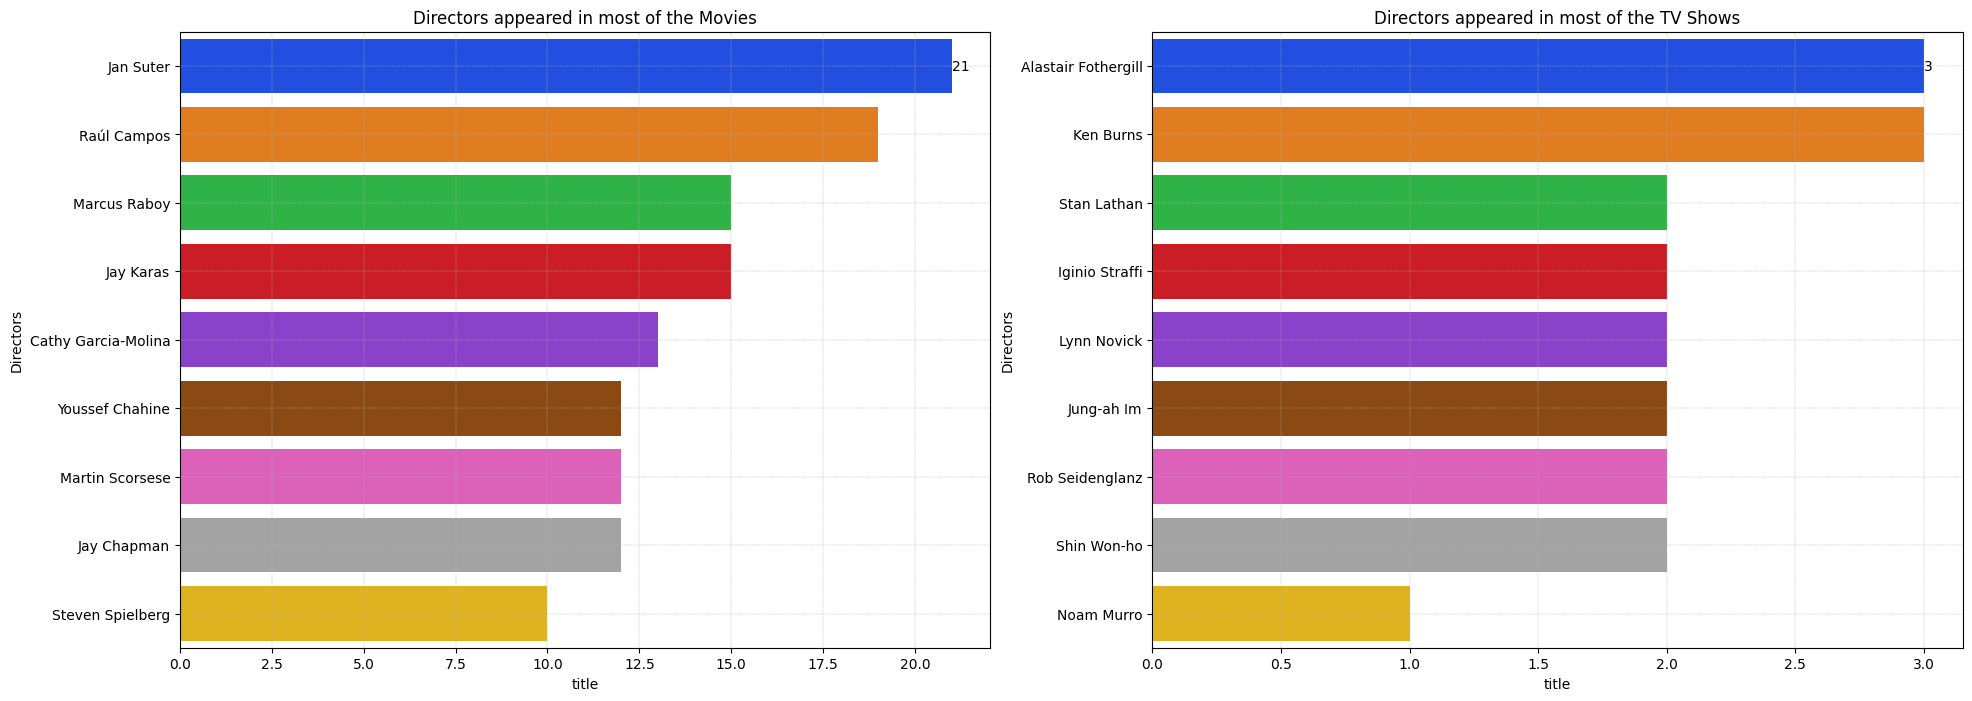

In [36]:
# Chart - 4 visualization code
# Top 10 Directors in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='bright')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?



1.   Most of the movies directed by Jan suter.
2.   Most TV shows directed by ken burns.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Producers of movies and TV shows have the option to choose renowned directors for their upcoming projects, enhancing the potential success of their productions.

#### Chart - 5 - What are the top 10 Countries involved in content creation?

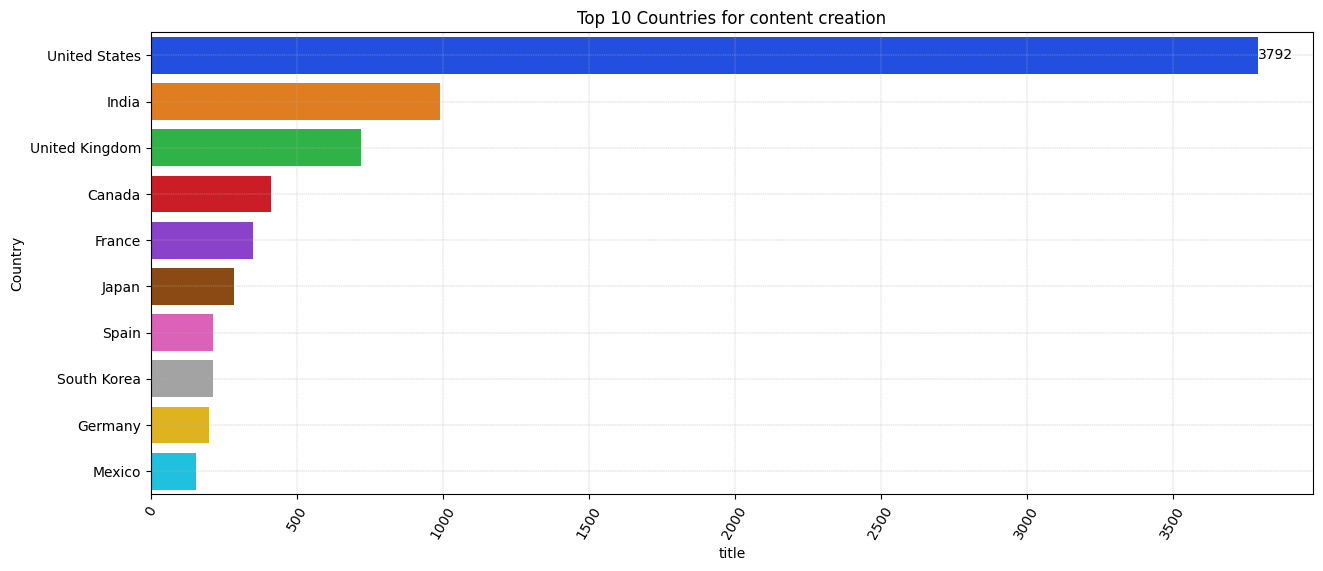

In [37]:
# Chart - 5 visualization code

df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='bright' )
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?



1.   The United States is the top country producing both movies and TV shows on Netflix. This suggests that Netflix is heavily influenced by American content.
2.   India is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.
3. Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Indeed, leveraging these insights can significantly benefit Netflix's business by identifying avenues for growth and expansion. This includes strategies such as increasing investments in American and Bollywood content and broadening their content acquisition to encompass a wider diversity of offerings.

#### Chart - 6 - Which Countries has the highest spread of Movies and TV Shows over Netflix ?

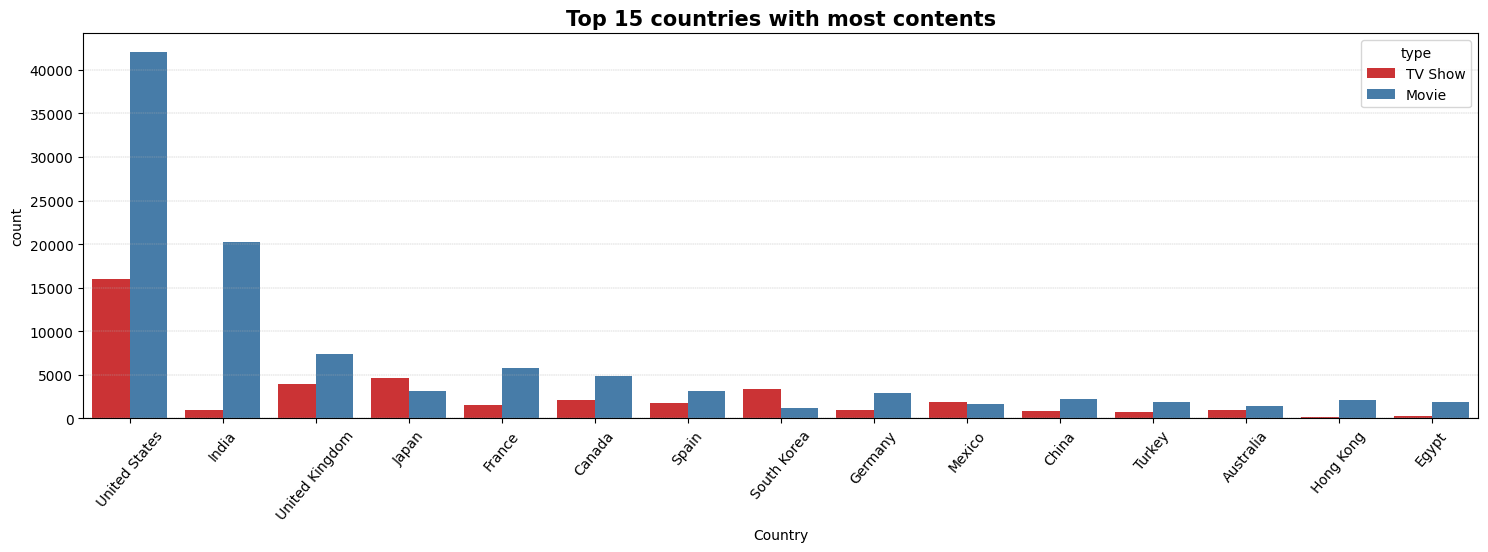

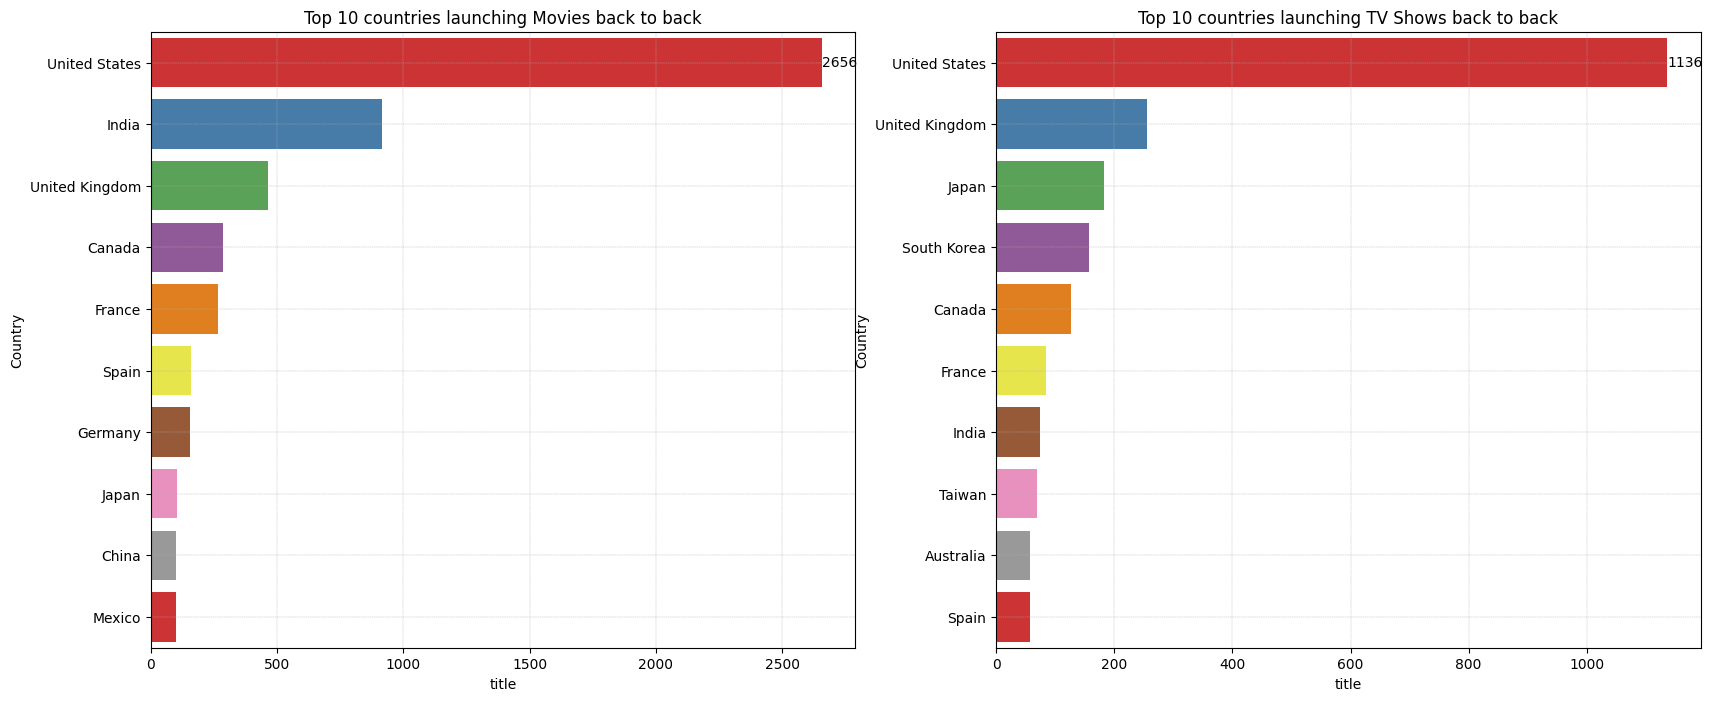

In [38]:
# Chart - 6 visualization code

#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:15],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='Set1')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces what type of content the most.

##### 2. What is/are the insight(s) found from the chart?



*   INDIA Produces most amount of Movies compared to TV Shows.
*   Japan and South korea produces more TV Shows compared to Movies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, the insights acquired can positively influence Netflix's business by illuminating pathways for growth and expansion. This includes the potential to procure and develop additional Indian films, as well as to enhance their collection of TV series from Japan and South Korea.

#### Chart - 7 - Which Genres are Popular in Netflix

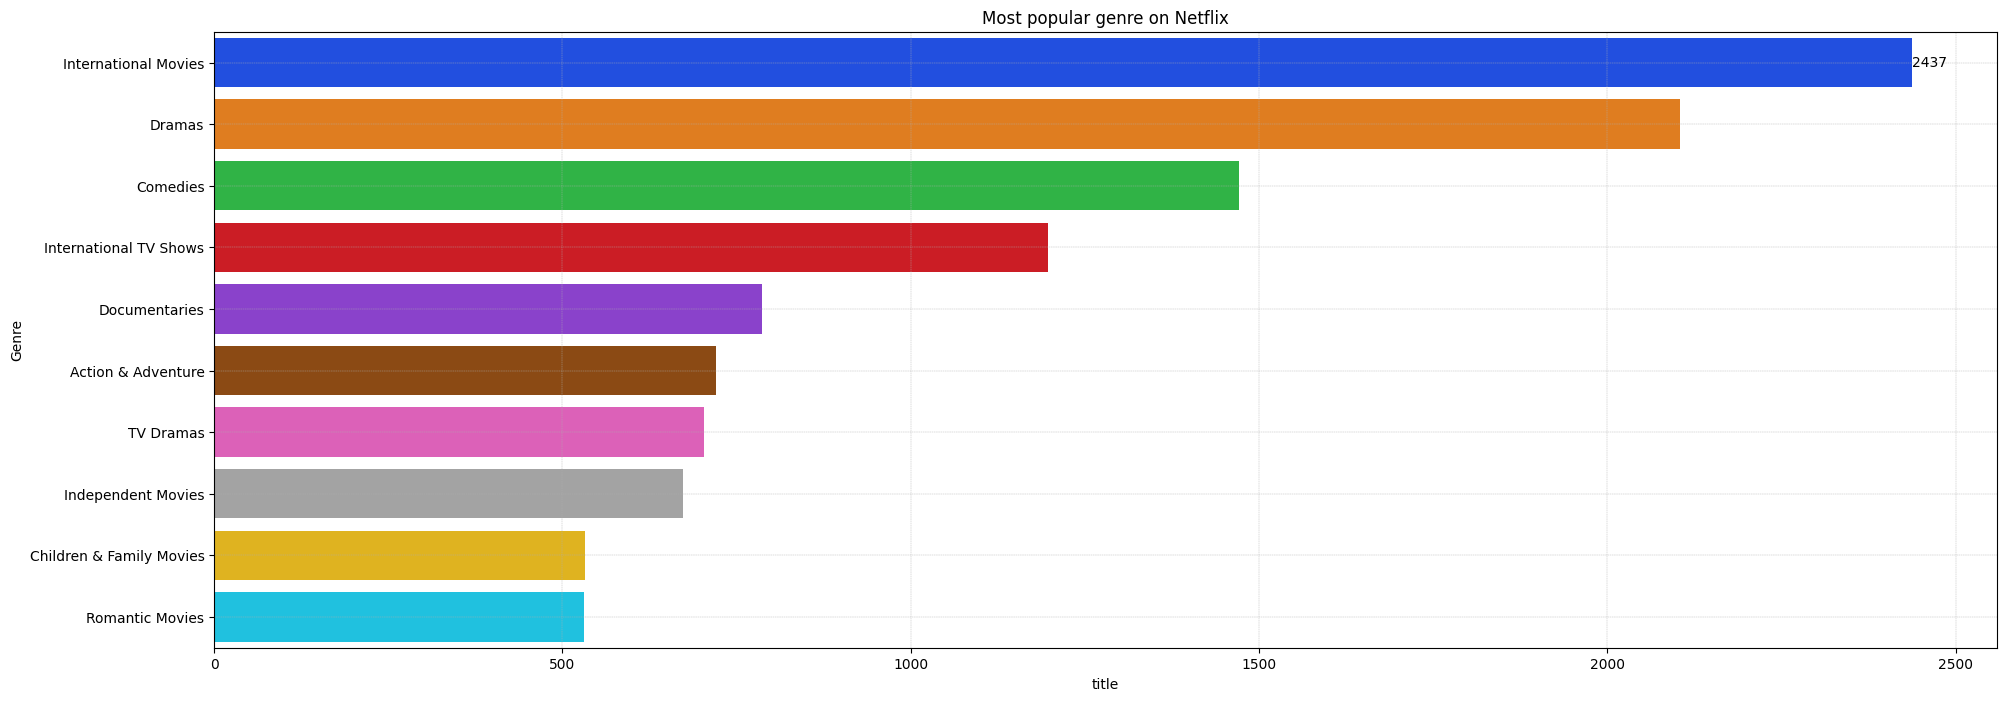

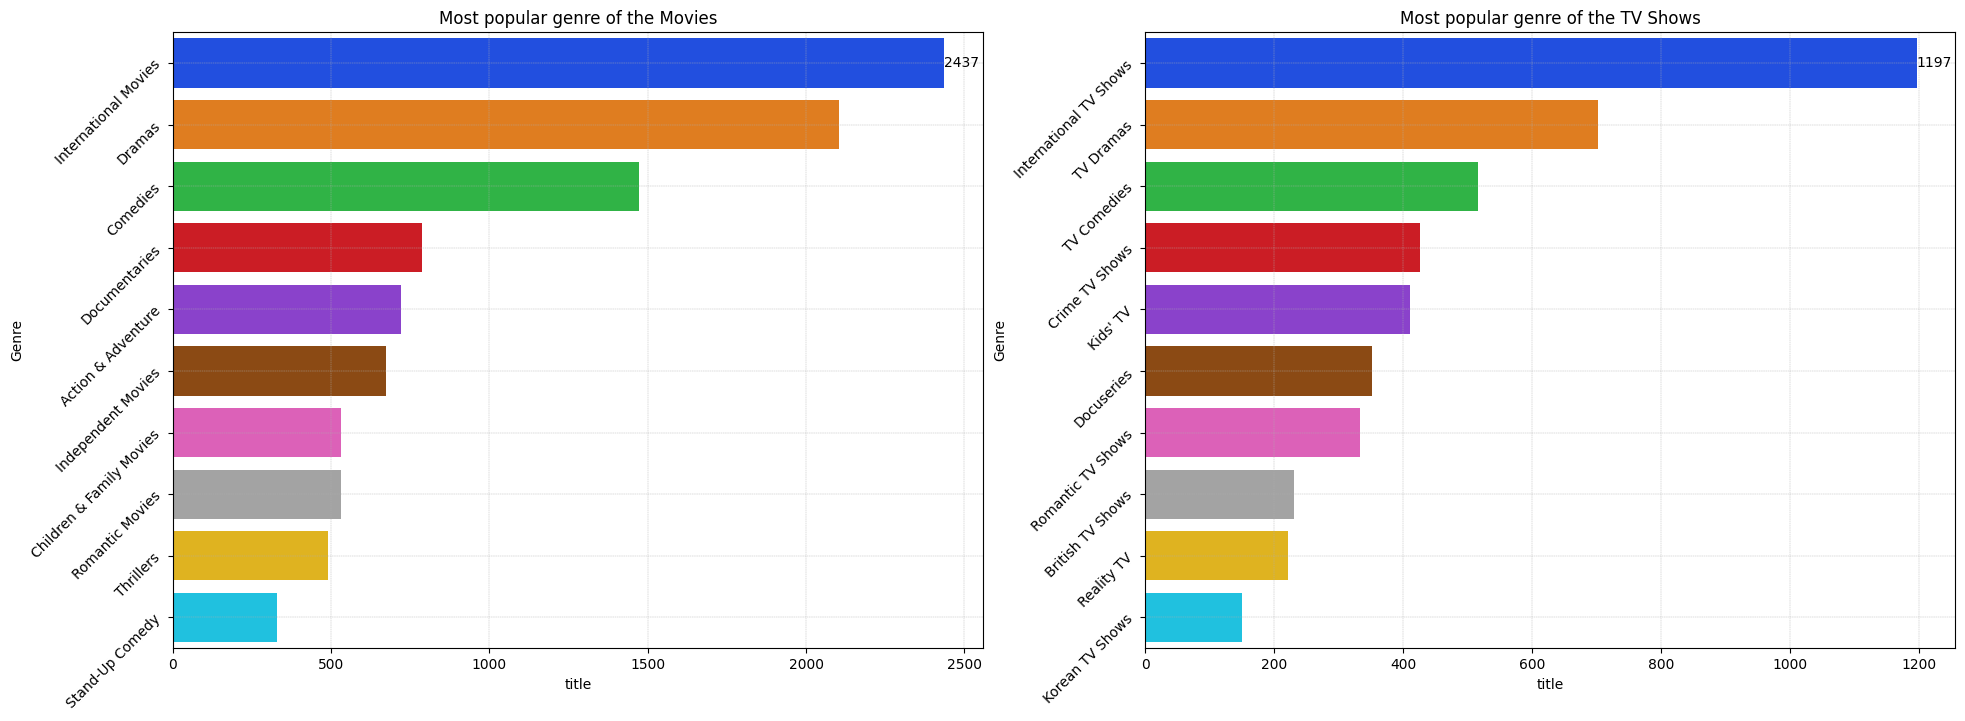

In [39]:
# Chart - 7 visualization code
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette = 'bright')
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='bright')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()


##### 1. Why did you pick the specific chart?

This graph tells us which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

International movies genre is most popular in both the TV Shows and Movies category. Followed by Drama and comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience. This information can help Netflix tailor its content acquisition and production strategies to better cater to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

#### Chart - 8 - Total number of Movies/TV Shows released and added per year on Netflix

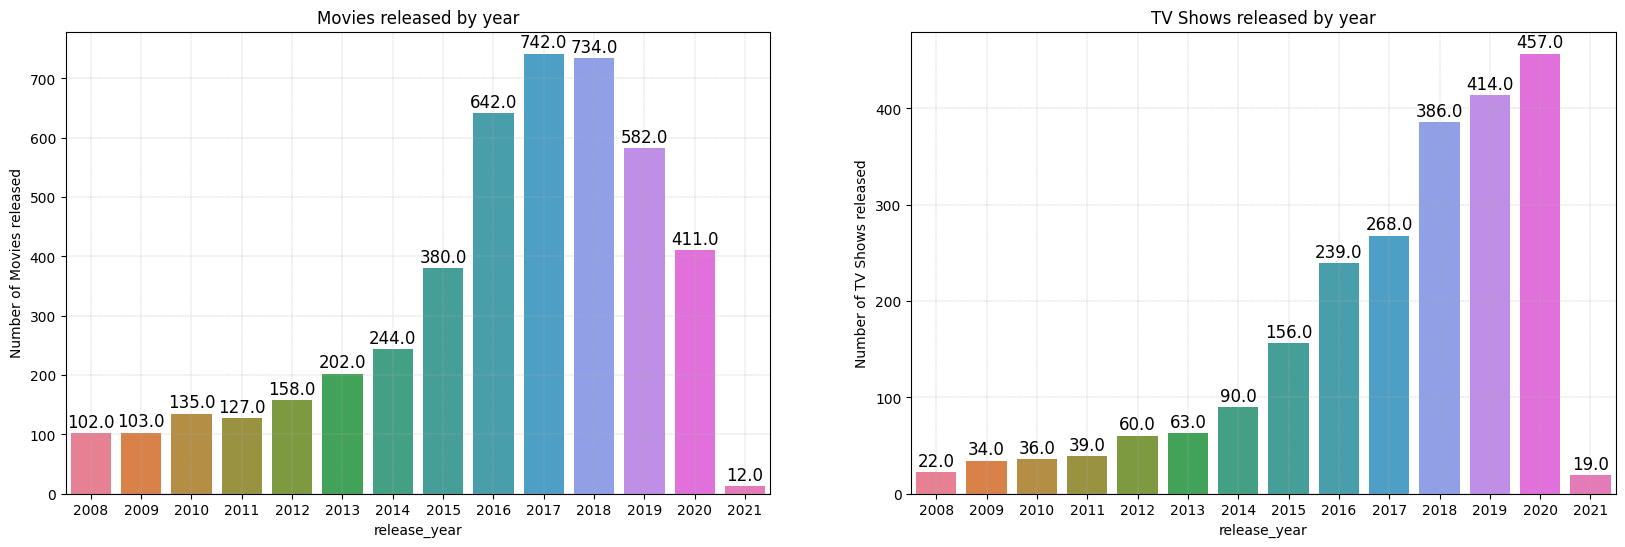

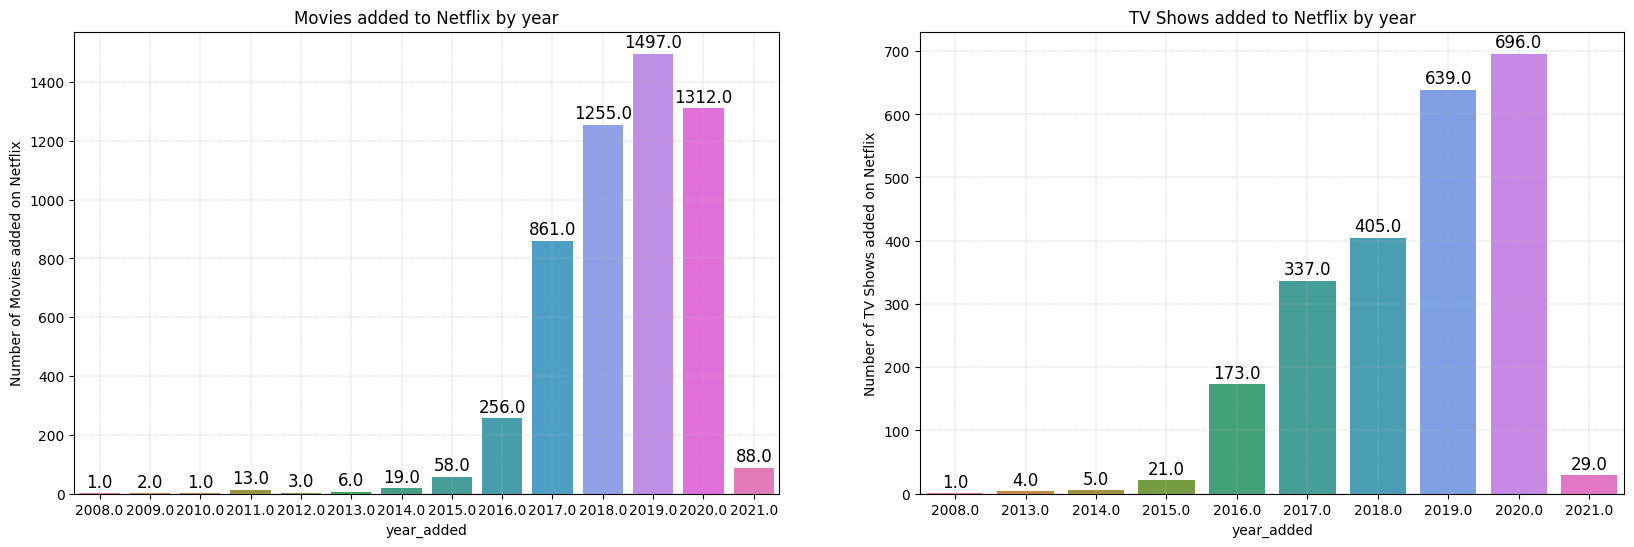

In [40]:
# Chart - 8 visualization code
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us how many movies and TV Show released and added in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can see that the number of movies and TV shows added on Netflix has been increasing steadily every year. But since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased. In terms of movies and TV Shows addition, in 2020 Number of movies added as compared to 2019 were vey less and on the other side number of TV Shows were more as compare to 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observation that the quantity of newly added movies has declined since 2018, contrasting with a notable increase in the addition of TV shows, poses a potential risk of negative growth for Netflix. This trend may stem from multiple factors, including evolving consumer tastes, heightened competition from rival streaming platforms, and the escalating expenses linked to movie production.

To mitigate the potential negative impact, Netflix could explore strategies to diversify its content offerings and adapt to changing consumer preferences. This could include investing in a mix of movies, TV shows, and other forms of original content such as documentaries, limited series, and stand-up comedy specials. By diversifying its content offerings, Netflix can attract a wider audience and maintain its relevance in the ever-evolving streaming landscape.

#### Chart - 9 - Total Number of Movies/TV Shows added per month on Netflix

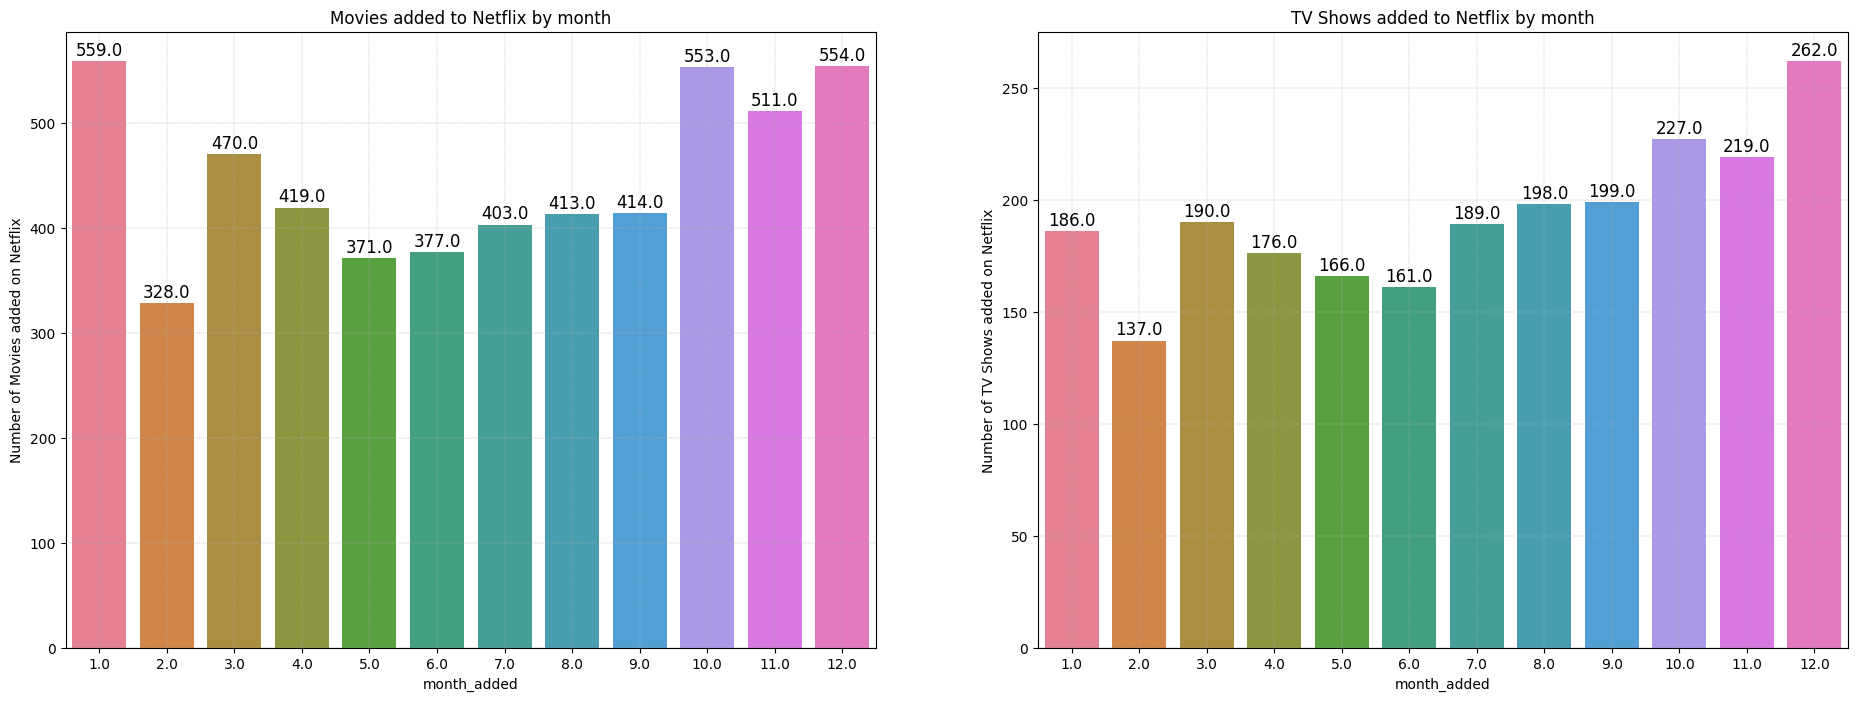

In [41]:
# Chart - 9 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted this graph to know in which month the movie/tv shows added is maximum and in which year minimum.

##### 2. What is/are the insight(s) found from the chart?



*   We found that October, November and December are the most popular months for TV shows addition.
*   January, October and December are the most popular months for movie addition.

*   February is the least popular month for the movies and TV shows to be added on Netflix.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Leveraging these insights, Netflix can achieve a favorable business outcome by pinpointing the months with the highest demand for new content additions. This strategic approach enables Netflix to schedule content releases during peak periods, resulting in heightened user engagement and improved retention rates.

Observing that February registers the lowest volume of new content additions underscores the risk of negative growth if Netflix fails to sustain a steady influx of fresh content during this timeframe. Maintaining consistent audience engagement year-round is crucial for Netflix to prevent discontent and the potential attrition of subscribers.

#### Chart - 10 - Total Number of Movies/TV Shows added per day on Netflix

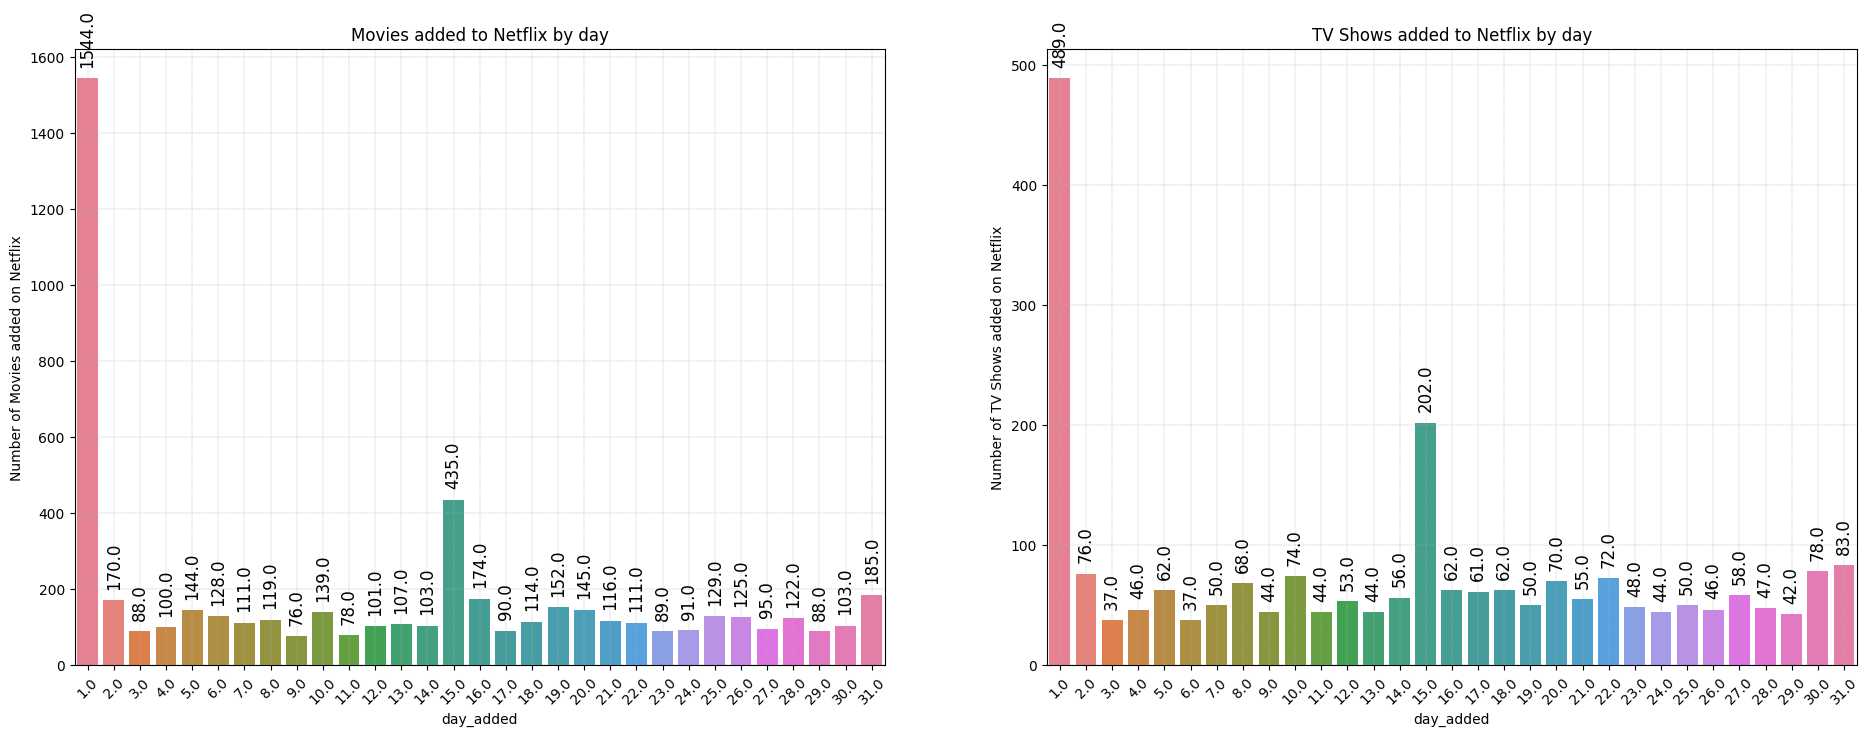

In [42]:
# Chart - 10 visualization code
plt.figure(figsize=(23, 8))
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)
    df_day = i.groupby(['day_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['day_added'], ascending=False)
    plots = sns.barplot(x='day_added', y='title', data=df_day, palette='husl')
    plt.title(f'{j} added to Netflix by day')
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    for bar in plots.patches:
        plots.annotate(bar.get_height(),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='bottom',
                       size=12, xytext=(0, 8),
                       textcoords='offset points', rotation=90)
plt.show()



##### 1. Why did you pick the specific chart?

This graph shows us the day when most of the movies added in a month.

##### 2. What is/are the insight(s) found from the chart?

The bar plots reveal a trend where the majority of movies and TV shows are added either at the start or midway through the month. This pattern might be attributed to the fact that individuals typically have more leisure time and disposable income around these periods, especially after receiving their salaries. Releasing new content during these times could potentially boost viewership. By scheduling new releases at the beginning and middle of the month, subscribers are likely to perceive greater value for their subscription, potentially resulting in higher retention rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, releasing new content at regular intervals helps to keep users engaged with the platform, as they will have something new to look forward to every few weeks. This can lead to increased viewing hours and user satisfaction, both of which can have positive impacts on the business.

#### Chart - 11 - What is the Month-wise number of content added in each year on Netflix?

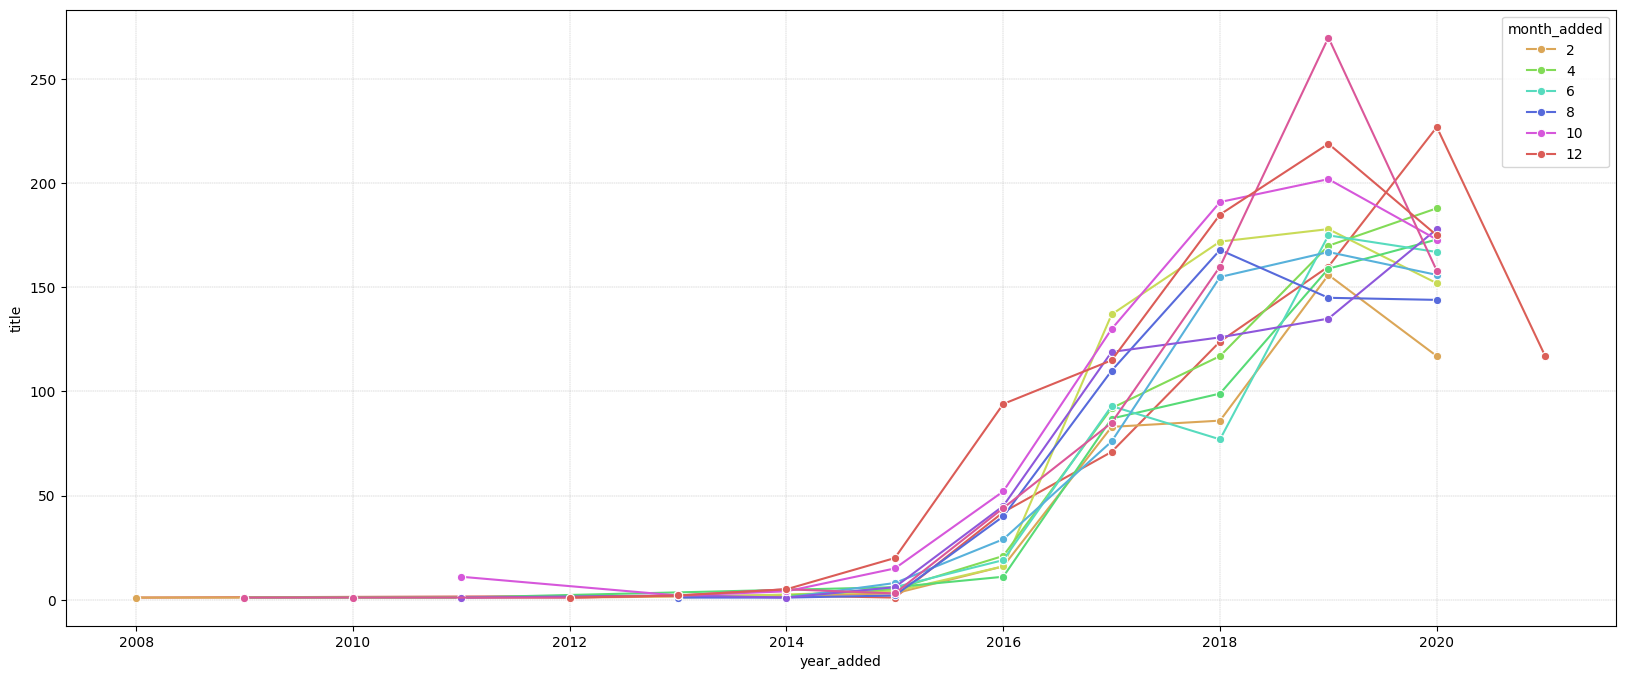

In [82]:
# Chart - 11 visualization code
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This bivariate graph helps us in knowing which month is dominating in adding movie/tvshows in a year.

##### 2. What is/are the insight(s) found from the chart?



*   We can see that there is no specific trend is followed, Instead of this some consecutive years shows month wise trend.
*   From 2008 to 2009 we see movies added in the month of February, and from 2009 to 2011 movies added in the month of February and October.

*   After 2015 majority content added in the month of october to december


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Producers should add there movies in the month when audience is more responsive.


*   Although no specific trend is shown but most movies should be uploaded in year end with some discount in the subscription.



#### Chart - 12 - What is the Day-wise number of content added in each year on Netflix?

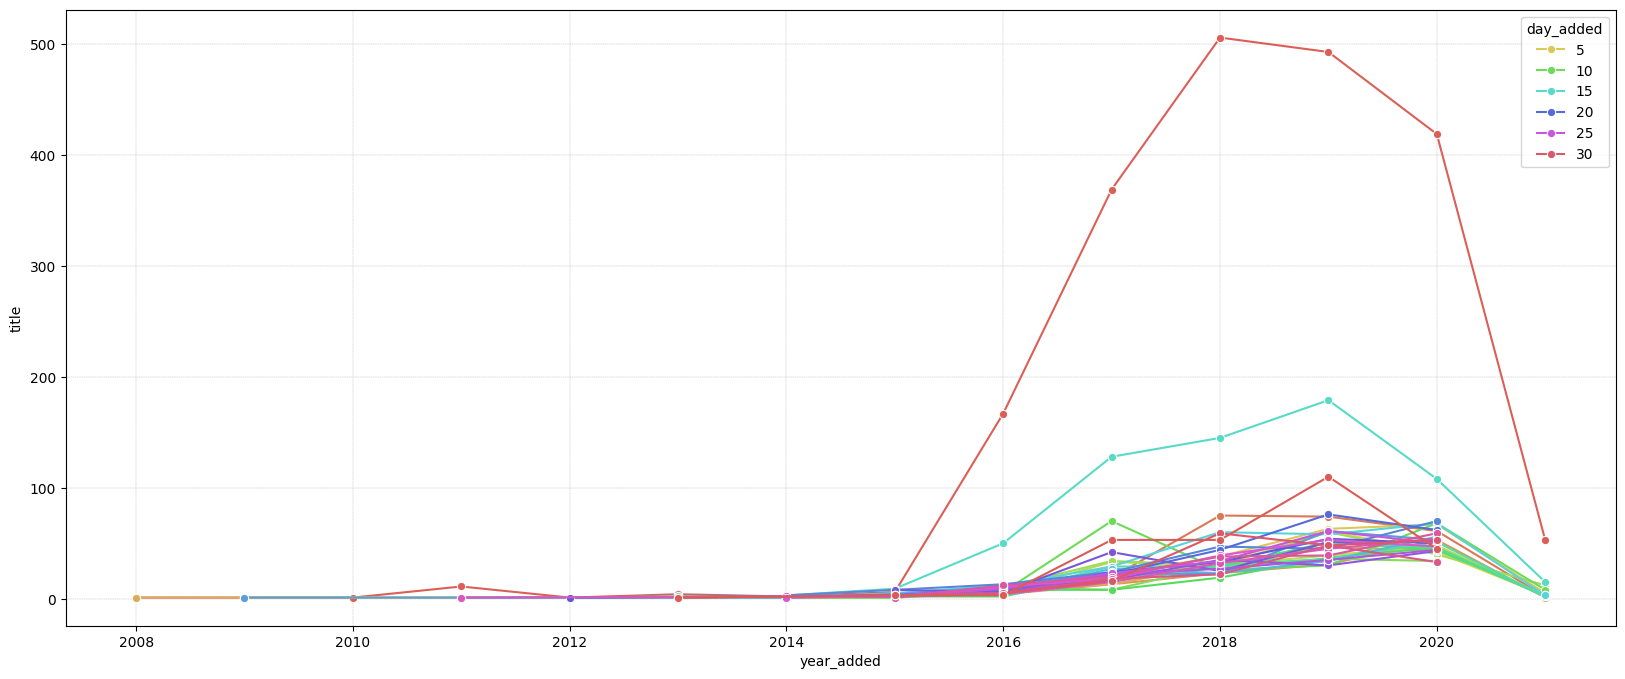

In [83]:
# Chart - 12 visualization code
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['day_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This graph help us in knowing which day is more frequent in movie addition year wise.

##### 2. What is/are the insight(s) found from the chart?



*   Movies from 2008 to 2009 added on 5th day of the month.
*   Movies from 2009 to 2010 added on 15th day of the month.

*   Most of the movies from 2010 to 2012 added in the month end.
*   From 2015 onwords most of the movies are added in month end or mid month.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently most of the movies are added in 15th day of month or at the last day of month, so before releasing the movies consider this trend also.

#### Chart - 13 - What is the Distribution of Duration of contents over Netflix?

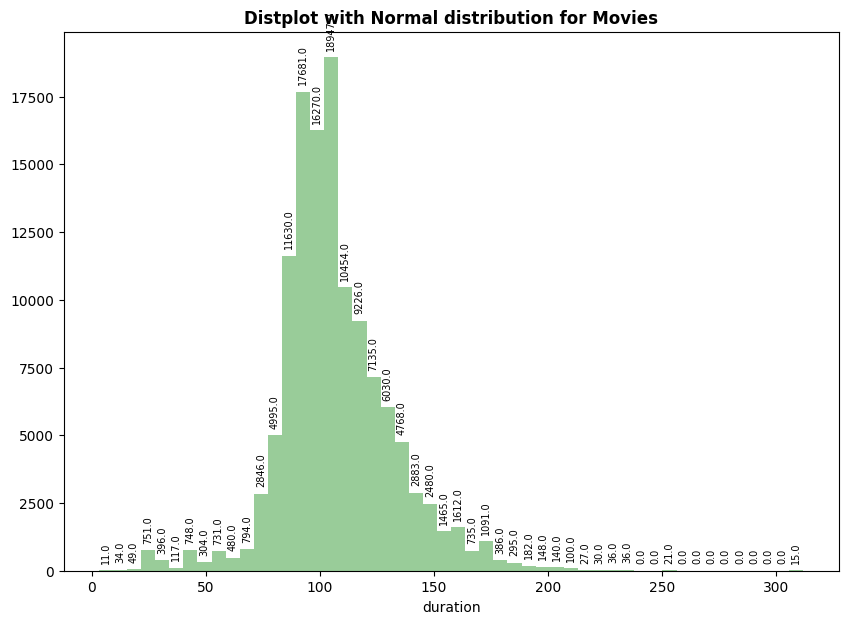

In [84]:
# Chart - 13 visualization code
plt.figure(figsize=(10,7))
plots= sns.distplot(df_movies['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

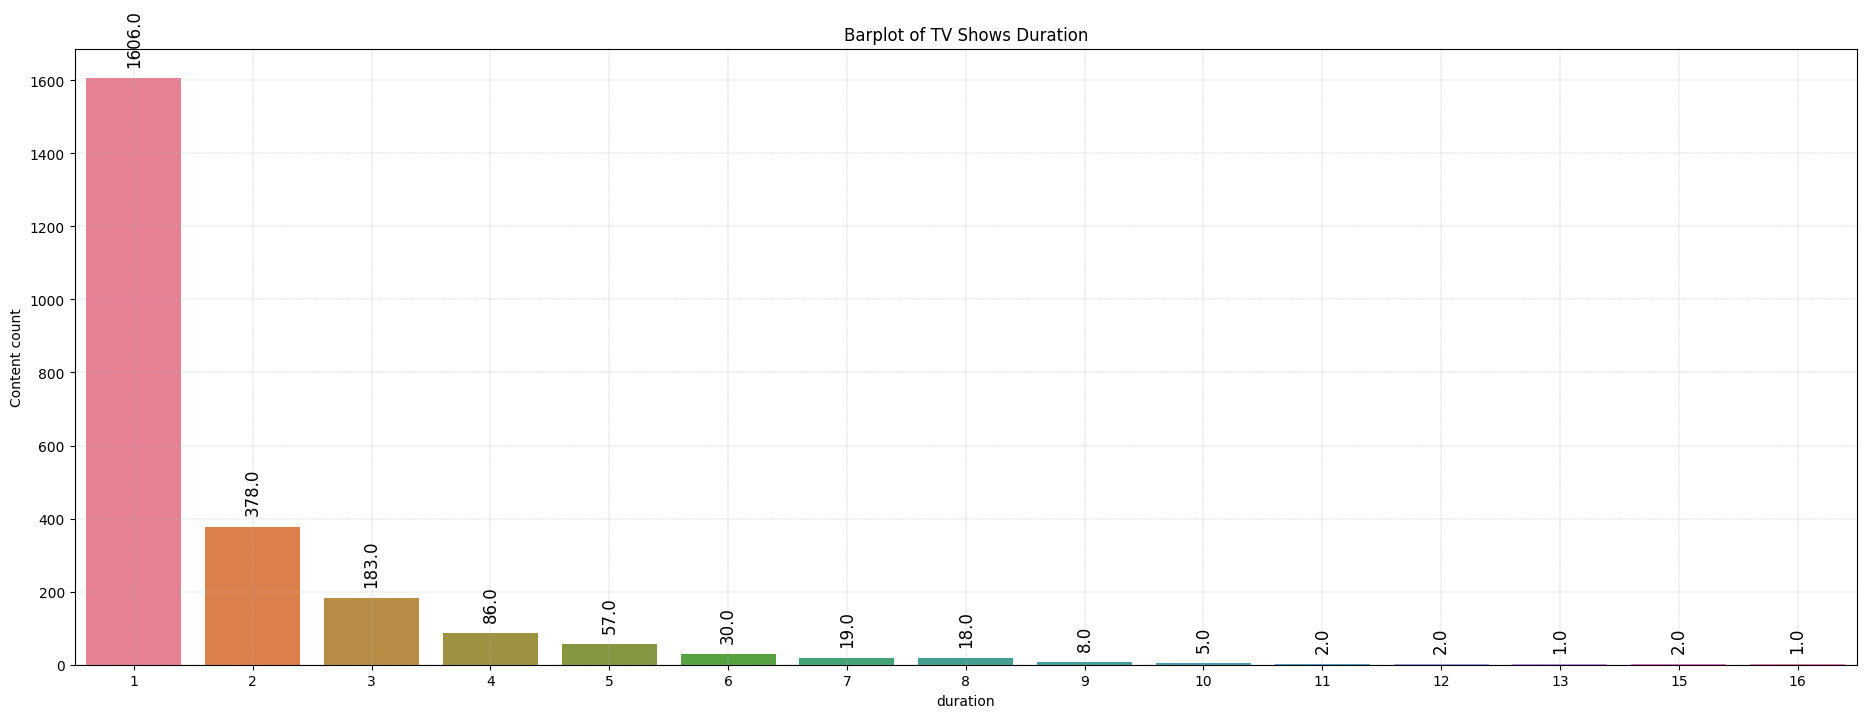

In [85]:
plt.figure(figsize=(23,8))
df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To know the duration distribution for Movies and TV Shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?



*   The histogram of the distribution of movie durations in minutes on Netflix shows that the majority of movies on Netflix have a duration between 80 to 120 minutes.
*   The countplot of the distribution of TV show durations in seasons on Netflix shows that the most common duration for TV shows on Netflix is one season, followed by two seasons.



#### Chart - 14 - Correlation Heatmap - What is the Distribution of Content Rating in each highest content creating countries?

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [47]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [52]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [53]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [54]:
# Expand Contraction

#### 2. Lower Casing

In [55]:
# Lower Casing

#### 3. Removing Punctuations

In [56]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [57]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [58]:
# Remove Stopwords

In [59]:
# Remove White spaces

#### 6. Rephrase Text

In [60]:
# Rephrase Text

#### 7. Tokenization

In [61]:
# Tokenization

#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [63]:
# POS Taging

#### 10. Text Vectorization

In [64]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [66]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [67]:
# Transform Your data

### 6. Data Scaling

In [68]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [69]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [71]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [72]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [77]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [80]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [81]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***